In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
plt.style.use('seaborn')

In [46]:
!cd zippedData/
!pwd
!ls

/Users/mitchellkrieger/Documents/Flatiron/Phase 1/Phase-1-project
CONTRIBUTING.md          README.md                student.ipynb
LICENSE.md               Untitled.ipynb           zippedData
Project dataframes.ipynb awesome.gif


In [2]:
rt_review_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter = '\t', encoding = 'unicode_escape')

In [3]:
rt_review_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [4]:
imdb_title_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title_df.isna().sum()
imdb_title_df.drop(['original_title'],axis=1, inplace = True)
imdb_title_df.duplicated().sum()

0

In [6]:
imdb_title_df.genres.str.contains('Action')

0          True
1         False
2         False
3         False
4         False
          ...  
146139    False
146140    False
146141    False
146142      NaN
146143    False
Name: genres, Length: 146144, dtype: object

In [7]:
imdb_title_df.head(10)

,tconst,primary_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,2017,80.0,"Comedy,Drama,Fantasy"
5,tt0111414,A Thin Life,2018,75.0,Comedy
6,tt0112502,Bigfoot,2017,NaN,"Horror,Thriller"
7,tt0137204,Joe Finds Grace,2017,83.0,"Adventure,Animation,Comedy"
8,tt0139613,O Silêncio,2012,NaN,"Documentary,History"
9,tt0144449,Nema aviona za Zagreb,2012,82.0,Biography


In [8]:
imdb_title_df.start_year.unique()

array([2013, 2019, 2018, 2017, 2012, 2010, 2011, 2015, 2021, 2016, 2014,
       2020, 2022, 2023, 2024, 2026, 2025, 2115, 2027])

In [9]:
imdb_name_df = pd.read_csv('zippedData/imdb.name.basics.csv.gz')
imdb_name_df.drop(['birth_year','death_year', 'primary_profession'], axis=1, inplace= True)


In [10]:
imdb_name_df.head()

,nconst,primary_name,known_for_titles
0,nm0061671,Mary Ellen Bauder,"tt0837562,tt2398241,tt0844471,tt0118553"
1,nm0061865,Joseph Bauer,"tt0896534,tt6791238,tt0287072,tt1682940"
2,nm0062070,Bruce Baum,"tt1470654,tt0363631,tt0104030,tt0102898"
3,nm0062195,Axel Baumann,"tt0114371,tt2004304,tt1618448,tt1224387"
4,nm0062798,Pete Baxter,"tt0452644,tt0452692,tt3458030,tt2178256"


In [11]:
type(imdb_name_df.known_for_titles.iloc[0])

str

In [12]:
##### Remove all non US region rows, language column, attributes column, is_original_title column
imdb_title_akas_df = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
imdb_title_akas_df.rename({'title_id':'tconst'}, axis=1, inplace = True)
imdb_title_akas_df.loc[imdb_title_akas_df['region'] == 'US']

,tconst,ordering,title,region,language,types,attributes,is_original_title
12,tt0369610,21,Jurassic World 3D,US,NaN,NaN,3-D version,0.0
20,tt0369610,29,Jurassic World,US,NaN,NaN,NaN,0.0
21,tt0369610,2,Ebb Tide,US,NaN,NaN,fake working title,0.0
28,tt0369610,36,Jurassic Park IV,US,NaN,working,NaN,0.0
37,tt0369610,44,Jurassic Park 4,US,NaN,NaN,informal alternative title,0.0
...,...,...,...,...,...,...,...,...
331645,tt9310460,6,Coconut the Little Dragon 2 Into the Jungle,US,NaN,imdbDisplay,NaN,0.0
331654,tt9358044,2,Hail Satan?,US,NaN,imdbDisplay,NaN,0.0
331673,tt9562694,5,Alien Warfare,US,NaN,imdbDisplay,NaN,0.0
331686,tt9705860,1,Dusan Vukotic Croatian Oscar Winner,US,NaN,imdbDisplay,NaN,0.0


In [13]:
imdb_title_akas_df.head()

,tconst,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,NaN,NaN,0.0
1,tt0369610,11,Jurashikku warudo,JP,NaN,imdbDisplay,NaN,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,NaN,imdbDisplay,NaN,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,NaN,NaN,short title,0.0
4,tt0369610,14,Jurassic World,FR,NaN,imdbDisplay,NaN,0.0


In [14]:
imdb_title_akas_df.is_original_title.unique()

array([ 0.,  1., nan])

In [15]:
imdb_title_akas_df['region'].value_counts()

US      51490
XWW     18467
RU      13817
DE      11634
FR      10990
        ...  
WF          1
SB          1
AI          1
XNA         1
CSHH        1
Name: region, Length: 213, dtype: int64

In [16]:
imdb_title_crew_df = pd.read_csv('zippedData/imdb.title.crew.csv.gz')

In [17]:
imdb_title_crew_df.head()
#imdb_title_crew_df.isna().sum()


,tconst,directors,writers
0,tt0285252,nm0899854,nm0899854
1,tt0438973,NaN,"nm0175726,nm1802864"
2,tt0462036,nm1940585,nm1940585
3,tt0835418,nm0151540,"nm0310087,nm0841532"
4,tt0878654,"nm0089502,nm2291498,nm2292011",nm0284943


In [18]:
imdb_principles_df = pd.read_csv('zippedData/imdb.title.principals.csv.gz')

In [19]:
imdb_principles_df.head(10)

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,NaN,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,NaN,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,NaN,"[""Lady Delia Morrison""]"
8,tt0323808,5,nm0362736,director,NaN,NaN
9,tt0323808,6,nm0811056,producer,producer,NaN


In [19]:
imdb_principles_df.loc[imdb_principles_df['ordering'] == 10]

,tconst,ordering,nconst,category,job,characters
3,tt0323808,10,nm0059247,editor,NaN,NaN
13,tt0417610,10,nm0284261,composer,NaN,NaN
23,tt0469152,10,nm3745712,editor,NaN,NaN
36,tt0475290,10,nm0005683,cinematographer,director of photography,NaN
46,tt0477302,10,nm0579580,cinematographer,director of photography,NaN
...,...,...,...,...,...,...
1028075,tt9581844,10,nm0886829,cinematographer,NaN,NaN
1028085,tt9581996,10,nm2984088,cinematographer,NaN,NaN
1028121,tt9670776,10,nm10512345,actor,NaN,NaN
1028131,tt9670894,10,nm10435886,producer,producer,NaN


In [20]:
imdb_title_rating_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
imdb_title_rating_df.drop(['numvotes'], axis = 1, inplace = True)

In [21]:
imdb_title_rating_df.head()



,tconst,averagerating
0,tt10356526,8.3
1,tt10384606,8.9
2,tt1042974,6.4
3,tt1043726,4.2
4,tt1060240,6.5


In [21]:
bom_movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')


In [22]:
bom_movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [23]:
movie_budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [24]:
movie_budget_df['worldwide_gross'] = movie_budget_df['worldwide_gross'].str.replace('$','').str.replace(',','').astype(int)




In [25]:
movie_budget_df['domestic_gross'] = movie_budget_df['domestic_gross'].str.replace('$','').str.replace(',','').astype(int)
movie_budget_df['production_budget'] = movie_budget_df['production_budget'].str.replace('$','').str.replace(',','').astype(int)


In [26]:
movie_budget_df['worldwide_net'] = movie_budget_df['worldwide_gross'] - movie_budget_df['production_budget']

In [27]:
movie_budget_df['percent_gross'] = (movie_budget_df['worldwide_net'] / movie_budget_df['production_budget'])*100
movie_budget_df.rename({'movie':'primary_title'}, axis = 1, inplace = True)
movie_budget_df.drop(['release_date'],axis = 1, inplace = True)

In [28]:
movie_budget_df.drop(['id'],axis = 1, inplace = True)

In [29]:
movie_budget_df.head()

,primary_title,production_budget,domestic_gross,worldwide_gross,worldwide_net,percent_gross
0,Avatar,425000000,760507625,2776345279,2351345279,553.257713
1,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,635063875,154.667286
2,Dark Phoenix,350000000,42762350,149762350,-200237650,-57.210757
3,Avengers: Age of Ultron,330600000,459005868,1403013963,1072413963,324.384139
4,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,999721747,315.369636


In [30]:
rt_movie_info = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter = '\t', encoding = 'unicode_escape')


In [31]:
joined_table = imdb_title_df.merge(movie_budget_df, how='left', on = 'primary_title')


In [235]:
joined_table = joined_table.drop(joined_table.loc[joined_table.primary_title == 'Cinderella'].index)

,tconst,primary_title,start_year,runtime_minutes,genres,production_budget,domestic_gross,worldwide_gross,worldwide_net,percent_gross
654,tt10013634,Cinderella,2018,150.0,Musical,2900000.0,85000000.0,263591415.0,260691415.0,8989.359138
1696,tt10155932,Cinderella,2021,NaN,"Comedy,Fantasy",2900000.0,85000000.0,263591415.0,260691415.0,8989.359138
12427,tt1661199,Cinderella,2015,105.0,"Drama,Family,Fantasy",2900000.0,85000000.0,263591415.0,260691415.0,8989.359138
63544,tt3645784,Cinderella,2013,120.0,Music,2900000.0,85000000.0,263591415.0,260691415.0,8989.359138
87812,tt5089556,Cinderella,2015,113.0,Fantasy,2900000.0,85000000.0,263591415.0,260691415.0,8989.359138
97525,tt5684194,Cinderella,2016,130.0,Musical,2900000.0,85000000.0,263591415.0,260691415.0,8989.359138
138659,tt8907882,Cinderella,2018,NaN,Drama,2900000.0,85000000.0,263591415.0,260691415.0,8989.359138


In [33]:
joined_table.isna().sum()
joined_table.dropna(subset = ['production_budget'], inplace = True)


In [236]:
droped_genres_dataframe = joined_table.dropna(subset = ['genres'])

In [237]:
no_zero_gross = droped_genres_dataframe.loc[(droped_genres_dataframe.domestic_gross > 0) & (droped_genres_dataframe.worldwide_gross >0)]





In [238]:
tolerence = no_zero_gross.percent_gross.quantile(.99)

no_out_no_zero = no_zero_gross.drop(no_zero_gross.loc[no_zero_gross.percent_gross > tolerence].index)

In [228]:
no_zero_gross.loc[no_zero_gross.percent_gross > tolerence]

,tconst,primary_title,start_year,runtime_minutes,genres,production_budget,domestic_gross,worldwide_gross,worldwide_net,percent_gross
654,tt10013634,Cinderella,2018,150.0,Musical,2900000.0,85000000.0,263591415.0,260691415.0,8989.359138
1696,tt10155932,Cinderella,2021,NaN,"Comedy,Fantasy",2900000.0,85000000.0,263591415.0,260691415.0,8989.359138
8368,tt1502407,Halloween,2018,106.0,"Horror,Thriller",325000.0,47000000.0,70000000.0,69675000.0,21438.461538
9519,tt1560985,The Devil Inside,2012,83.0,Horror,1000000.0,53262945.0,101759490.0,100759490.0,10075.949000
12427,tt1661199,Cinderella,2015,105.0,"Drama,Family,Fantasy",2900000.0,85000000.0,263591415.0,260691415.0,8989.359138
35700,tt2309260,The Gallows,2015,81.0,"Horror,Mystery,Thriller",100000.0,22764410.0,41656474.0,41556474.0,41556.474000
44042,tt2616818,Graduation Day,2015,75.0,Thriller,250000.0,23894000.0,23894000.0,23644000.0,9457.600000
45089,tt2668120,Bambi,2013,58.0,"Biography,Documentary",858000.0,102797000.0,268000000.0,267142000.0,31135.431235
52056,tt3080284,Rocky,2013,136.0,"Action,Comedy,Drama",1000000.0,117235147.0,225000000.0,224000000.0,22400.000000
58299,tt3393372,Night of the Living Dead,2014,79.0,Horror,114000.0,12087064.0,30087064.0,29973064.0,26292.161404


In [239]:
no_out_no_zero.shape

(3189, 10)

In [240]:
no_zero_gross.shape

(3200, 10)

In [241]:
genre_list = ['Action','Adventure','Fantasy','Drama','Romance','Comedy','Sci-Fi','Biography','Documentary','Thriller','Animation','Crime','Family','History','Horror','Musical','Mystery','War','Western']
def genre_dataframe_select(genre):
    return no_zero_gross.loc[no_zero_gross.genres.str.contains(genre)]



In [37]:
len(genre_list)

19

In [242]:

def genre_vs_net (genre,ax):
    df = genre_dataframe_select(genre)
    y = df.groupby(['start_year'])['worldwide_net'].mean()[:10]
    x = y.index
    
    ax.bar(x, y)
    ax.set_title(f'{genre}')
    ax.set_xticks([])
    ax.set_ylim(bottom=0,top= 5.5e8)
    return ax


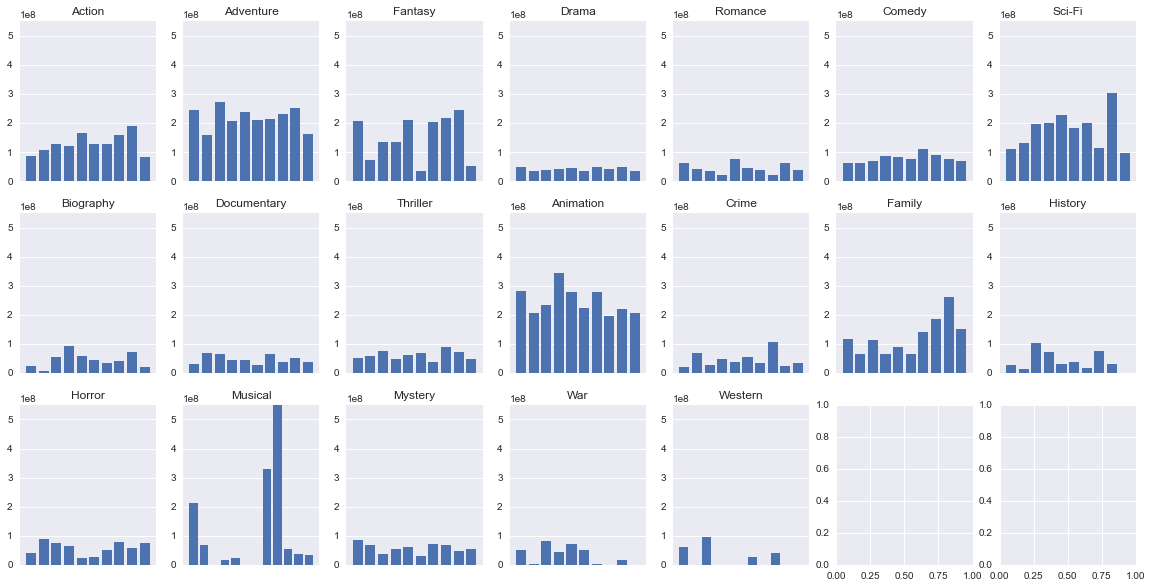

In [243]:
figure, ax = plt.subplots(figsize = (20,10),ncols=7, nrows=3)
for i,genre in enumerate(genre_list):
    col = i%7
    row = i//7
    genre_vs_net(genre,ax[row][col])


In [245]:
action_df = no_zero_gross.loc[no_zero_gross.genres.str.contains('Action')]
adventure_df = no_zero_gross.loc[no_zero_gross.genres.str.contains('Adventure')]
fantasy_df = no_zero_gross.loc[no_zero_gross.genres.str.contains('Fantasy')]
sci_fi_df = no_zero_gross.loc[no_zero_gross.genres.str.contains('Sci-Fi')]
animation_df = no_zero_gross.loc[no_zero_gross.genres.str.contains('Animation')]
musical_df = no_zero_gross.loc[no_zero_gross.genres.str.contains('Musical')]
drama_df = no_zero_gross.loc[no_zero_gross.genres.str.contains('Drama')]
romance_df = no_zero_gross.loc[no_zero_gross.genres.str.contains('Romance')]
Comedy_df = no_zero_gross.loc[no_zero_gross.genres.str.contains('Comedy')]
Biography_df = no_zero_gross.loc[no_zero_gross.genres.str.contains('Biography')]
Documentary_df = no_zero_gross.loc[no_zero_gross.genres.str.contains('Documentary')]
Thriller_df = no_zero_gross.loc[no_zero_gross.genres.str.contains('Thriller')]
Animation_df = no_zero_gross.loc[no_zero_gross.genres.str.contains('Animation')]
Crime_df = no_zero_gross.loc[no_zero_gross.genres.str.contains('Crime')]
Family_df = no_zero_gross.loc[no_zero_gross.genres.str.contains('Family')]
History_df = no_zero_gross.loc[no_zero_gross.genres.str.contains('History')]
Horror_df = no_zero_gross.loc[no_zero_gross.genres.str.contains('Horror')]
Mystery_df = no_zero_gross.loc[no_zero_gross.genres.str.contains('Mystery')]
War_df = no_zero_gross.loc[no_zero_gross.genres.str.contains('War')]
Western_df = no_zero_gross.loc[no_zero_gross.genres.str.contains('Western')]


Text(0.5, 1.0, 'Musical')

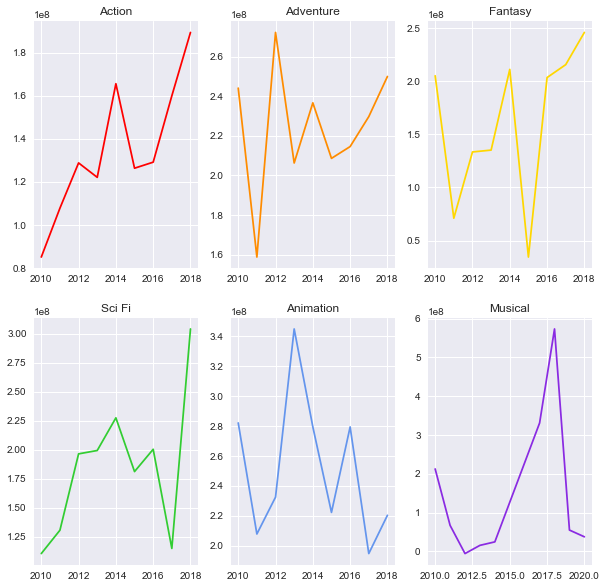

In [246]:
figure_target_genre, ax = plt.subplots(2,3, figsize = (10,10))

y1 = action_df.groupby(['start_year'])['worldwide_net'].mean()[:9]
x1 = y1.index

y2 = adventure_df.groupby(['start_year'])['worldwide_net'].mean()[:9]
x2 = y2.index

y3 = fantasy_df.groupby(['start_year'])['worldwide_net'].mean()[:9]
x3 = y3.index

y4 = sci_fi_df.groupby(['start_year'])['worldwide_net'].mean()[:9]
x4 = y4.index

y5 = animation_df.groupby(['start_year'])['worldwide_net'].mean()[:9]
x5 = y5.index

y6 = musical_df.groupby(['start_year'])['worldwide_net'].mean()[:9]
x6 = y6.index

ax[0][0].plot(x1,y1, color = 'red')
ax[0][0].set_title('Action')

ax[0][1].plot(x2,y2, color = 'darkorange')
ax[0][1].set_title('Adventure')

ax[0][2].plot(x3,y3, color = 'gold')
ax[0][2].set_title('Fantasy')

ax[1][0].plot(x4,y4, color = 'limegreen')
ax[1][0].set_title('Sci Fi') 

ax[1][1].plot(x5,y5, color = 'cornflowerblue')
ax[1][1].set_title('Animation')

ax[1][2].plot(x6,y6, color = 'blueviolet')
ax[1][2].set_title('Musical')

Text(0.5, 1.0, 'Top 6 High Profit Genre')

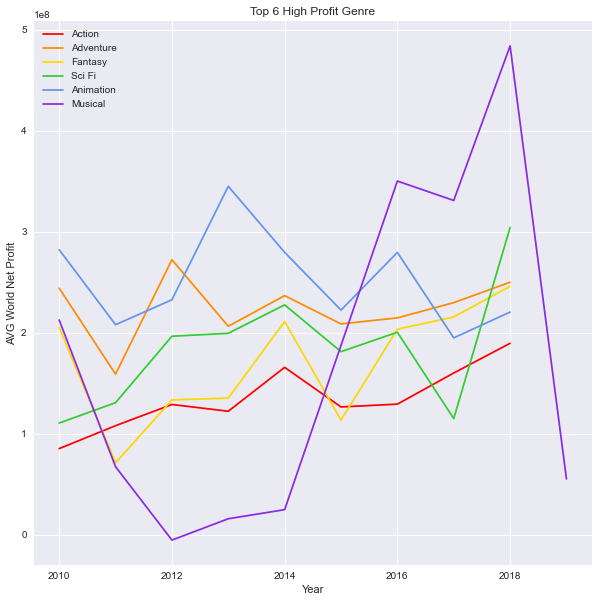

In [192]:
figure_target_genre_overlap, ax = plt.subplots(figsize = (10,10))

y1 = action_df.groupby(['start_year'])['worldwide_net'].mean()[:9]
x1 = y1.index

y2 = adventure_df.groupby(['start_year'])['worldwide_net'].mean()[:9]
x2 = y2.index

y3 = fantasy_df.groupby(['start_year'])['worldwide_net'].mean()[:9]
x3 = y3.index

y4 = sci_fi_df.groupby(['start_year'])['worldwide_net'].mean()[:9]
x4 = y4.index

y5 = animation_df.groupby(['start_year'])['worldwide_net'].mean()[:9]
x5 = y5.index

y6 = musical_df.groupby(['start_year'])['worldwide_net'].mean()[:9]
x6 = y6.index

ax.plot(x1,y1, label = 'Action', color = 'red')

ax.plot(x2,y2, label = 'Adventure', color = 'darkorange')

ax.plot(x3,y3, label = 'Fantasy', color = 'gold')

ax.plot(x4,y4, label = 'Sci Fi', color = 'limegreen')

ax.plot(x5,y5, label = 'Animation', color = 'cornflowerblue')

ax.plot(x6,y6, label = 'Musical', color = 'blueviolet')

plt.legend()
ax.set_xlabel('Year')
ax.set_ylabel('AVG World Net Profit')
ax.set_title('Top 6 High Profit Genre')

In [257]:
def genre_vs_percent_gross (genre,ax):
    df = genre_dataframe_select(genre)
    y = df.groupby(['start_year'])['percent_gross'].mean()[:10]
    x = y.index
    
    ax.bar(x, y)
    ax.set_title(f'{genre}')
    ax.set_xticks([])
    ax.set_ylim(bottom=0,top= 2e3)
    return ax

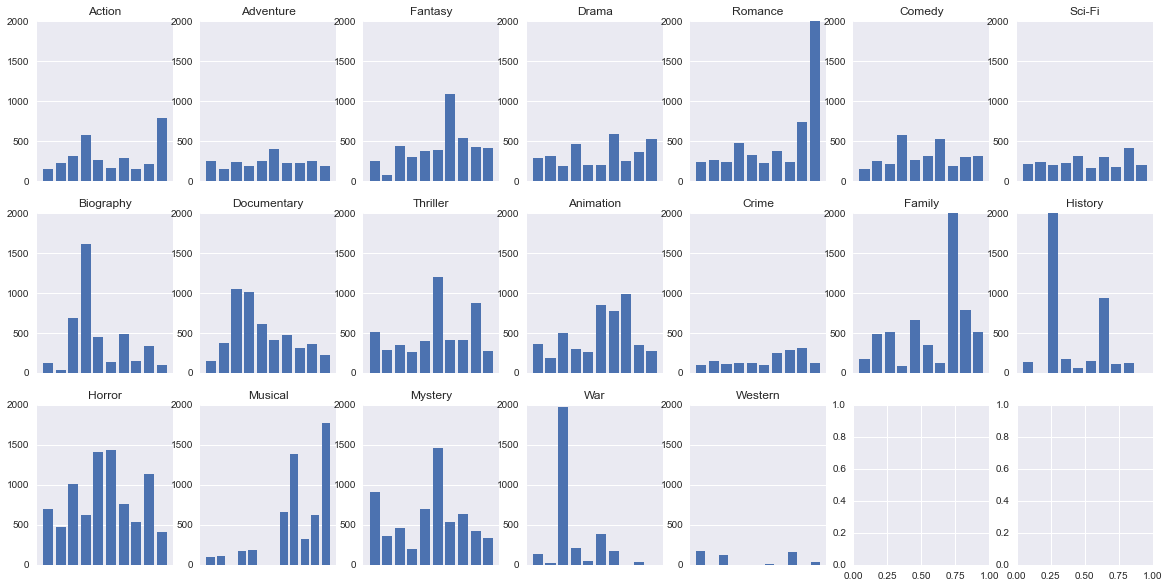

In [258]:
figure, ax = plt.subplots(figsize = (20,10),ncols=7, nrows=3)
for i,genre in enumerate(genre_list):
    col = i%7
    row = i//7
    genre_vs_percent_gross(genre,ax[row][col])

Text(0.5, 1.0, 'Musical')

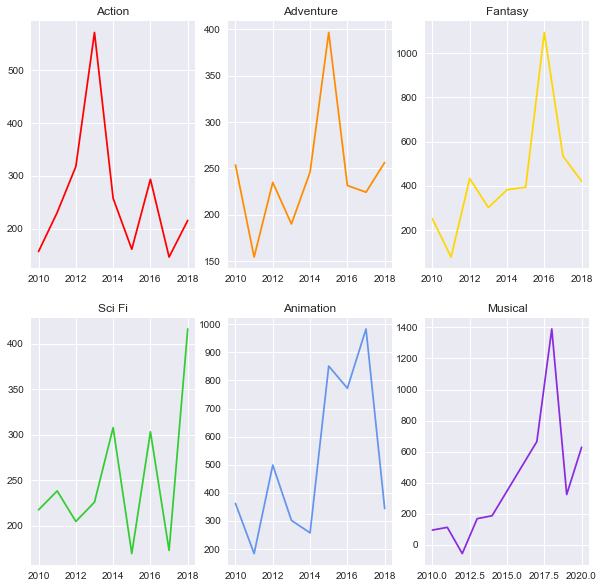

In [249]:
figure_target_genre, ax = plt.subplots(2,3, figsize = (10,10))

y1 = action_df.groupby(['start_year'])['percent_gross'].mean()[:9]
x1 = y1.index

y2 = adventure_df.groupby(['start_year'])['percent_gross'].mean()[:9]
x2 = y2.index

y3 = fantasy_df.groupby(['start_year'])['percent_gross'].mean()[:9]
x3 = y3.index

y4 = sci_fi_df.groupby(['start_year'])['percent_gross'].mean()[:9]
x4 = y4.index

y5 = animation_df.groupby(['start_year'])['percent_gross'].mean()[:9]
x5 = y5.index

y6 = musical_df.groupby(['start_year'])['percent_gross'].mean()[:9]
x6 = y6.index

ax[0][0].plot(x1,y1, color = 'red')
ax[0][0].set_title('Action')

ax[0][1].plot(x2,y2, color = 'darkorange')
ax[0][1].set_title('Adventure')

ax[0][2].plot(x3,y3, color = 'gold')
ax[0][2].set_title('Fantasy')

ax[1][0].plot(x4,y4, color = 'limegreen')
ax[1][0].set_title('Sci Fi') 

ax[1][1].plot(x5,y5, color = 'cornflowerblue')
ax[1][1].set_title('Animation')

ax[1][2].plot(x6,y6, color = 'blueviolet')
ax[1][2].set_title('Musical')


Text(0.5, 1.0, 'Top 6 High Profit Genre percent gross')

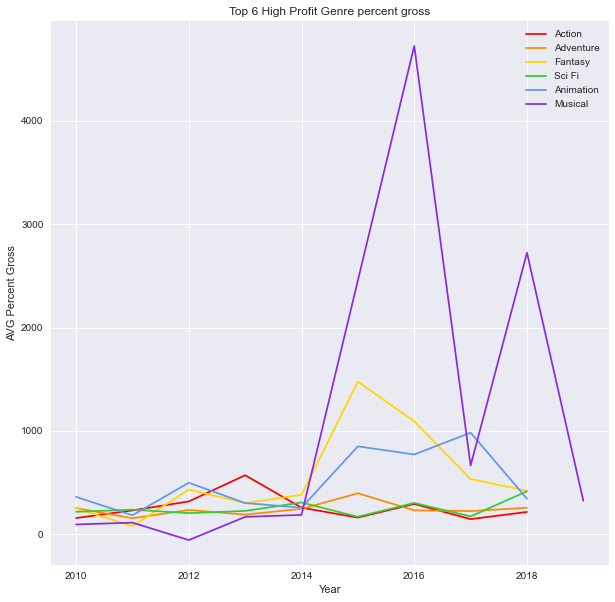

In [198]:
figure_target_genre_overlap, ax = plt.subplots(figsize = (10,10))

y1 = action_df.groupby(['start_year'])['percent_gross'].mean()[:9]
x1 = y1.index

y2 = adventure_df.groupby(['start_year'])['percent_gross'].mean()[:9]

y3 = fantasy_df.groupby(['start_year'])['percent_gross'].mean()[:9]

y4 = sci_fi_df.groupby(['start_year'])['percent_gross'].mean()[:9]

y5 = animation_df.groupby(['start_year'])['percent_gross'].mean()[:9]

y6 = musical_df.groupby(['start_year'])['percent_gross'].mean()[:9]


ax.plot(x1,y1, label = 'Action', color = 'red')

ax.plot(x2,y2, label = 'Adventure', color = 'darkorange')

ax.plot(x3,y3, label = 'Fantasy', color = 'gold')

ax.plot(x4,y4, label = 'Sci Fi', color = 'limegreen')

ax.plot(x5,y5, label = 'Animation', color = 'cornflowerblue')

ax.plot(x6,y6, label = 'Musical', color = 'blueviolet')

plt.legend()
ax.set_xlabel('Year')
ax.set_ylabel('AVG Percent Gross')
ax.set_title('Top 6 High Profit Genre percent gross')

Text(0.5, 1.0, 'Top 6 High Profit Genre percent gross')

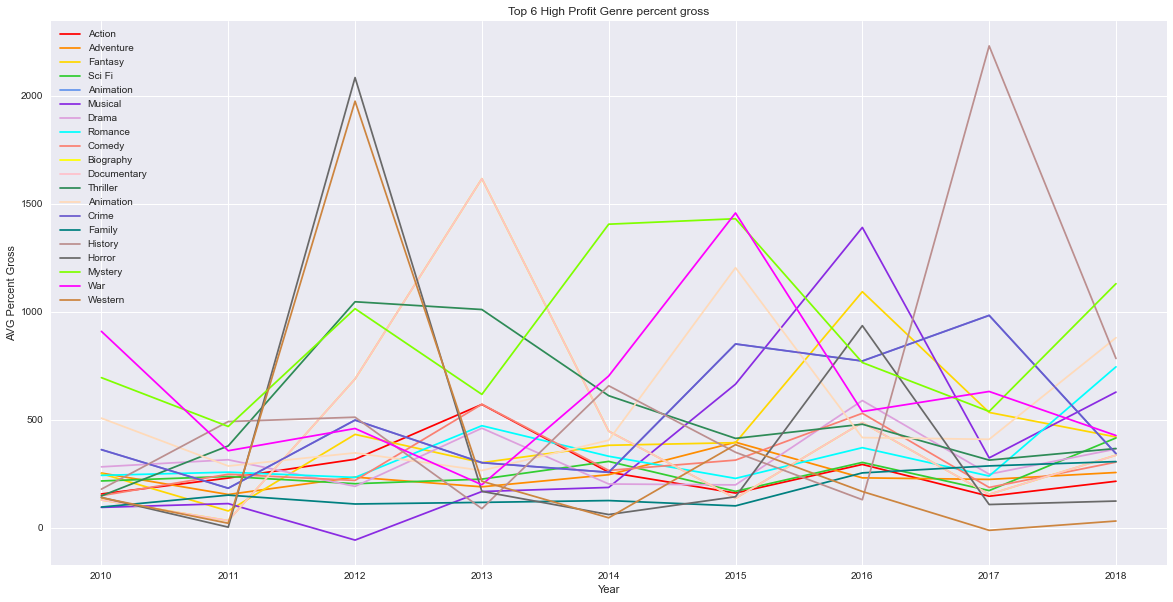

In [250]:
figure_target_genre_overlap, ax = plt.subplots(figsize = (20,10))

y1 = action_df.groupby(['start_year'])['percent_gross'].mean()[:9]
x = y1.index

y2 = adventure_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y3 = fantasy_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y4 = sci_fi_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y5 = animation_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y6 = musical_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y7 = drama_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y8 = romance_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y9 = Comedy_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y10 = Biography_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y11 = Documentary_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y12 = Thriller_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y13 = Animation_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y14 = Crime_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y15 = Family_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y16 = History_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y17 = Horror_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y18 = Mystery_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y19 = War_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y20 = Western_df.groupby(['start_year'])['percent_gross'].mean()[:9]

ax.plot(x,y1, label = 'Action', color = 'red')
ax.plot(x,y2, label = 'Adventure', color = 'darkorange')
ax.plot(x,y3, label = 'Fantasy', color = 'gold')
ax.plot(x,y4, label = 'Sci Fi', color = 'limegreen')
ax.plot(x,y5, label = 'Animation', color = 'cornflowerblue')
ax.plot(x,y6, label = 'Musical', color = 'blueviolet')
ax.plot(x,y7, label = 'Drama', color = 'plum')
ax.plot(x,y8, label = 'Romance', color = 'aqua')
ax.plot(x,y9, label = 'Comedy', color = 'salmon')
ax.plot(x,y10, label = 'Biography', color = 'yellow')
ax.plot(x,y10, label = 'Documentary', color = 'pink')
ax.plot(x,y11, label = 'Thriller', color = 'seagreen')
ax.plot(x,y12, label = 'Animation', color = 'peachpuff')
ax.plot(x,y13, label = 'Crime', color = 'slateblue')
ax.plot(x,y14, label = 'Family', color = 'teal')
ax.plot(x,y15, label = 'History', color = 'rosybrown')
ax.plot(x,y16, label = 'Horror', color = 'dimgray')
ax.plot(x,y17, label = 'Mystery', color = 'chartreuse')
ax.plot(x,y18, label = 'War', color = 'magenta')
ax.plot(x,y19, label = 'Western', color = 'peru')

plt.legend()
ax.set_xlabel('Year')
ax.set_ylabel('AVG Percent Gross')
ax.set_title('Top 6 High Profit Genre percent gross')

In [259]:
musical_df.groupby(['primary_title','start_year'])['percent_gross'].max().sort_values(ascending=False)[:9]

primary_title            start_year
Pinocchio                2021          3582.433569
Beauty and the Beast     2017          2942.155660
                         2018          2942.155660
West Side Story          2020           628.333333
Emma                     2018           541.214542
Yeh Jawaani Hai Deewani  2013           512.379108
Brooklyn                 2014           464.328555
Alice in Wonderland      2010           412.745555
The Greatest Showman     2017           360.316131
Name: percent_gross, dtype: float64

In [133]:
sci_fi_df.groupby(['primary_title'])['worldwide_gross'].max().sort_values(ascending=False)[:10]

primary_title
Avengers: Infinity War            2.048134e+09
Jurassic World                    1.648855e+09
The Avengers                      1.517936e+09
Avengers: Age of Ultron           1.403014e+09
Black Panther                     1.348258e+09
Jurassic World: Fallen Kingdom    1.305773e+09
Iron Man 3                        1.215392e+09
Captain America: Civil War        1.140069e+09
Transformers: Dark of the Moon    1.123791e+09
Captain Marvel                    1.123062e+09
Name: worldwide_gross, dtype: float64

In [127]:
action_df.groupby(['primary_title'])['worldwide_gross'].max().sort_values(ascending =False)[:10]

primary_title
Avengers: Infinity War            2.048134e+09
Jurassic World                    1.648855e+09
Furious 7                         1.518723e+09
The Avengers                      1.517936e+09
Avengers: Age of Ultron           1.403014e+09
Black Panther                     1.348258e+09
Jurassic World: Fallen Kingdom    1.305773e+09
Incredibles 2                     1.242521e+09
The Fate of the Furious           1.234846e+09
Iron Man 3                        1.215392e+09
Name: worldwide_gross, dtype: float64

In [130]:
animation_df.groupby(['primary_title'])['worldwide_gross'].max().sort_values(ascending =False)[:10]

primary_title
Frozen             1.272470e+09
Incredibles 2      1.242521e+09
Minions            1.160336e+09
Toy Story 3        1.068880e+09
Despicable Me 3    1.034728e+09
Finding Dory       1.021215e+09
Zootopia           1.019430e+09
The Lion King      9.862149e+08
Despicable Me 2    9.752168e+08
The Jungle Book    9.628545e+08
Name: worldwide_gross, dtype: float64

In [131]:
fantasy_df.groupby(['primary_title'])['worldwide_gross'].max().sort_values(ascending =False)[:10]

primary_title
Frozen                                         1.272470e+09
Beauty and the Beast                           1.259200e+09
Aquaman                                        1.146895e+09
Pirates of the Caribbean: On Stranger Tides    1.045664e+09
Alice in Wonderland                            1.025491e+09
The Hobbit: An Unexpected Journey              1.017004e+09
The Hobbit: The Desolation of Smaug            9.603669e+08
The Hobbit: The Battle of the Five Armies      9.455776e+08
Batman v Superman: Dawn of Justice             8.675003e+08
Wonder Woman                                   8.211334e+08
Name: worldwide_gross, dtype: float64

In [65]:
sci_fi_df.corr()

,start_year,runtime_minutes,production_budget,domestic_gross,worldwide_gross,worldwide_net,percent_gross
start_year,1.000000,0.013952,0.033881,0.011664,0.038409,0.037059,0.050882
runtime_minutes,0.013952,1.000000,0.613690,0.486283,0.547682,0.494958,-0.011751
production_budget,0.033881,0.613690,1.000000,0.722063,0.790326,0.686214,0.001554
domestic_gross,0.011664,0.486283,0.722063,1.000000,0.960370,0.958159,0.338331
worldwide_gross,0.038409,0.547682,0.790326,0.960370,1.000000,0.988001,0.312121
worldwide_net,0.037059,0.494958,0.686214,0.958159,0.988001,1.000000,0.370168
percent_gross,0.050882,-0.011751,0.001554,0.338331,0.312121,0.370168,1.000000


In [266]:
no_zero_gross.production_budget.sort_values(ascending = False)[:10]

17098     425000000.0
6471      410600000.0
112318    350000000.0
39092     330600000.0
72947     300000000.0
522       300000000.0
38456     300000000.0
5915      275000000.0
66417     275000000.0
73        275000000.0
Name: production_budget, dtype: float64

In [260]:
ex_high_budget_df = no_zero_gross.loc[no_zero_gross.production_budget > 85000000]
high_budget_df = no_zero_gross.loc[(no_zero_gross.production_budget < 85000000)  & (no_zero_gross.production_budget > 20000000)]
med_budget_df = no_zero_gross.loc[(no_zero_gross.production_budget < 20000000)  & (no_zero_gross.production_budget > 5000000)]
low_budget_df = no_zero_gross.loc[(no_zero_gross.production_budget < 5000000) & (no_zero_gross.production_budget > 500000)]
ex_low_budget_df = no_zero_gross.loc[no_zero_gross.production_budget < 500000]                                  



In [179]:
med_budget_df.shape

(827, 10)

In [263]:
ex_high_budget_df.production_budget.max()


425000000.0

In [177]:
low_budget_df.shape

(456, 10)

In [176]:
ex_low_budget_df.shape

(97, 10)

In [114]:
high_budget_df.groupby(['start_year'])['percent_gross'].mean()[:9]

start_year
2010    215.899592
2011    238.046084
2012    212.324220
2013    211.569350
2014    258.807553
2015    220.427223
2016    214.558357
2017    191.111120
2018    290.870171
Name: percent_gross, dtype: float64

In [136]:
low_budget_df.groupby(['primary_title'])['percent_gross'].max().sort_values(ascending = False)

primary_title
The Gallows                         41556.474000
Bambi                               31135.431235
Night of the Living Dead            26292.161404
Rocky                               22400.000000
Halloween                           21438.461538
                                        ...     
Eddie: The Sleepwalking Cannibal      -99.883429
Inescapable                           -99.891825
Higher Power                          -99.894400
Molly                                 -99.917162
Skin Trade                            -99.986200
Name: percent_gross, Length: 1776, dtype: float64

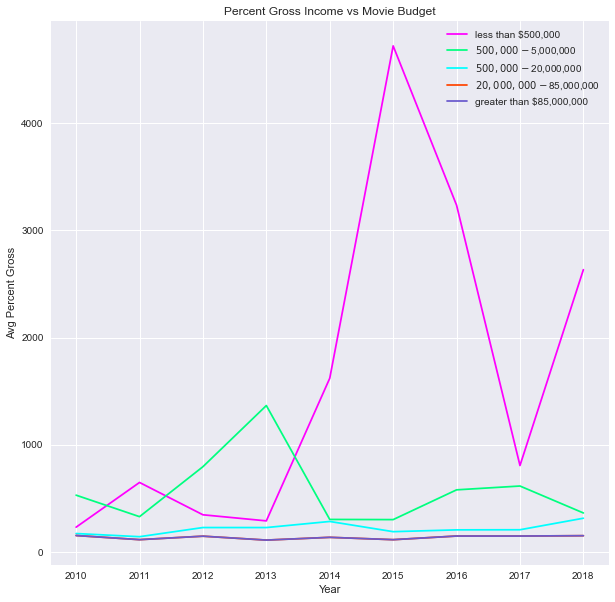

In [261]:
figure_budget, ax = plt.subplots(figsize = (10,10))

y1 = ex_low_budget_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y2 = low_budget_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y3 = med_budget_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y4 = high_budget_df.groupby(['start_year'])['percent_gross'].mean()[:9]
y5 = ex_high_budget_df.groupby(['start_year'])['percent_gross'].mean()[:9]
x = y1.index


ax.plot(x,y1, label = 'less than $500,000', color='magenta')
ax.plot(x,y2, label = '$500,000 - $5,000,000', color = 'springgreen')
ax.plot(x,y3, label = '$500,000 - $20,000,000', color = 'cyan')
ax.plot(x,y4, label = '$20,000,000 - $85,000,000', color = 'orangered')
ax.plot(x,y4, label = 'greater than $85,000,000', color = 'slateblue')
ax.set_title('Percent Gross Income vs Movie Budget')
ax.set_xlabel('Year')
ax.set_ylabel('Avg Percent Gross')

plt.legend()


Text(0, 0.5, 'Avg Net Profit')

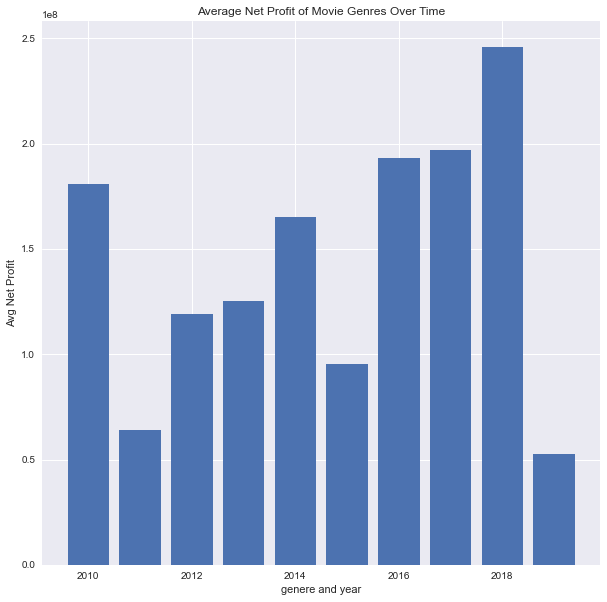

In [157]:
y = Fantasy.groupby(['start_year'])['worldwide_net'].mean()[:-1]
x = y.index
figure, ax = plt.subplots(figsize = (10,10))
ax.bar(x, y)

ax.set_title('Average Net Profit of Movie Genres Over Time')
ax.set_xlabel('year')
ax.set_ylabel('Avg Net Profit')

Drama                         497
Documentary                   290
Comedy                        140
Comedy,Drama                  104
Horror                         95
                             ... 
Action,Fantasy,Western          1
Comedy,Fantasy,Musical          1
Action,Comedy,Documentary       1
Documentary,Sport,Thriller      1
Adventure,Comedy,Romance        1
Name: genres, Length: 345, dtype: int64

In [83]:
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [84]:
rt_movie_info.shape

(1560, 12)

In [85]:
rt_movie_info.head(10)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN
5,8,The year is 1942. As the Allies unite overseas...,PG,Drama|Kids and Family,Jay Russell,Gail Gilchriest,"Mar 3, 2000","Jul 11, 2000",NaN,NaN,95 minutes,Warner Bros. Pictures
6,10,Some cast and crew from NBC's highly acclaimed...,PG-13,Comedy,Jake Kasdan,Mike White,"Jan 11, 2002","Jun 18, 2002",$,"41,032,915",82 minutes,Paramount Pictures
7,13,"Stewart Kane, an Irishman living in the Austra...",R,Drama,Ray Lawrence,Raymond Carver|Beatrix Christian,"Apr 27, 2006","Oct 2, 2007",$,"224,114",123 minutes,Sony Pictures Classics
8,14,"""Love Ranch"" is a bittersweet love story that ...",R,Drama,Taylor Hackford,Mark Jacobson,"Jun 30, 2010","Nov 9, 2010",$,"134,904",117 minutes,NaN
9,15,When a diamond expedition in the Congo is lost...,PG-13,Action and Adventure|Mystery and Suspense|Scie...,Frank Marshall,John Patrick Shanley,"Jun 9, 1995","Jul 27, 1999",NaN,NaN,108 minutes,NaN


In [86]:
rt_review_df.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
